In [2]:
import numpy as np

Lsun = 3.8*10**26
Tsun = 5777
d = 1.5*10**11
Msun = 2*10**30
Rsun = 7*10**8
Rearth = 6.4*10**6
sigma = 5.67*10**(-8)
h = 6.62*10**(-34)
eV = 1.6*10**(-19)

In [7]:
def temp1(albedo):
    T = (((Rsun**2.0)*(Tsun**4.0) *(1-albedo))/(4*(d**2.0)))**(.25)
    return T

print temp1(0), 'k'
print temp1(.3), 'k'

279.055611542 k
255.249717554 k


In [8]:
def tempout(albedo):
    T = (((Rearth**2.0)*(temp1(albedo)**4.0) * albedo * (1-albedo))/(4*(Rearth**2.0)))**(.25)
    return T

def temp2(albedo):
    T1 = tempout(albedo) * albedo
    #print T1
    T2 = temp1(albedo)
    #print T2
    T = T1 + T2
    return T

print temp2(.3), 'k'

291.904137462 k


1c)

B(lambda,T) = (2hc/(lamda^5))/(exp(hc/lambda*k*T) - 1)
F = pi * integral[ (1-a(lambda)) * B(lamda,T) * dlambda]

1d)

While greenhouse effect is desirable, too much of it is catastrophic. Which part of the above
equation shows the influence of increased concentration of greenhouse gasses? Using this information,
which molecule is the most prominent greenhouse gas and why? Which one is the most
problematic?
The a(lambda) term in the equation above shows the influence of increased concentration of greenhouse gasses. Water vapor is the most prominent greenhouse gas because as the atmosphere heats up, more water evaporates creating more water vapor. CO2 is the most problematic greenhouse gas because it does not regulate itself.

1e)

According to the simulation we are in trouble because the increase in CO2 in the atmosphere has spiked exponentially and the peak is much larger than it has been in the past 800000 years.

In [30]:
data = np.loadtxt('calidata_final.dat', unpack=True)
year, temp, precip, snow, nino = np.loadtxt('calidata_final.dat',unpack = True)

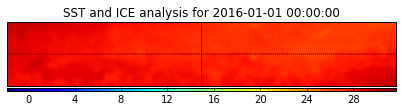

In [45]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
date = datetime(2016,1,1) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)

#m = Basemap(projection='kav7',lon_0=0,resolution=None)

m = Basemap(llcrnrlon=-150.,llcrnrlat=5.,urcrnrlon=-90.,urcrnrlat=-5.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

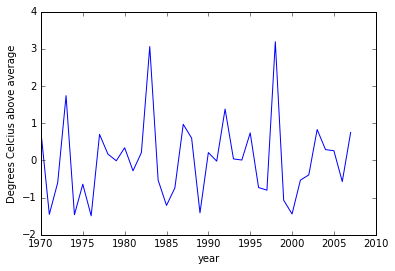

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

year, NINO3 = np.loadtxt('calidata_final.dat', usecols=(0, 4), unpack=True)
plt.plot(year, NINO3)
plt.xlabel("year")
plt.ylabel("Degrees Celcius above average")
plt.show()

In [52]:
n = 5
idx = (-NINO3).argsort()[:n]
print int(year[idx[0]]),  int(year[idx[1]]), int(year[idx[2]]), int(year[idx[3]]), int(year[idx[4]])

1998 1983 1973 1992 1987


In [71]:
temp, precip, snow = np.loadtxt('calidata_final.dat', usecols=(1, 2, 3), unpack=True)
n = 5
idx2 = (-temp).argsort()[:n]
idx3 = (-precip).argsort()[:n]
print idx, idx2, idx3
print 'No relative correlation between the 5 strongest years and their precipitations'

[28 13  3 22 17] [11 26 16 10 33] [23 28  8 13 27]
No relative correlation between the 5 strongest years and their precipitations


(0.29927122525910471, 0.067956903073737168)


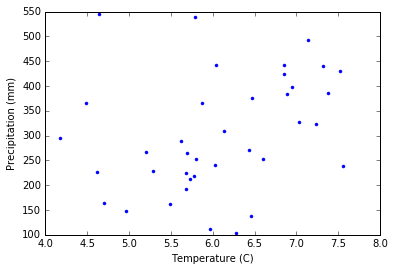

In [66]:
from scipy.stats.stats import pearsonr

print pearsonr(temp, precip)
plt.plot(temp,precip, marker = '.', linewidth = 0)
plt.xlabel('Temperature (C)')
plt.ylabel('Precipitation (mm)')

(0.14197230760465335, 0.39518075319425461)


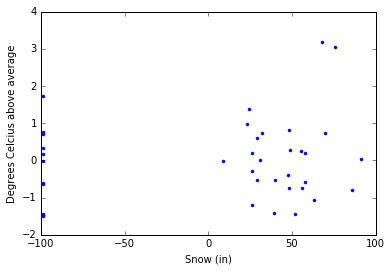

In [67]:
print pearsonr(snow, NINO3)
plt.plot(snow,NINO3, marker = '.', linewidth = 0)
plt.xlabel('Snow (in)')
plt.ylabel('Degrees Celcius above average')

(0.37712170125989769, 0.019596097409072206)


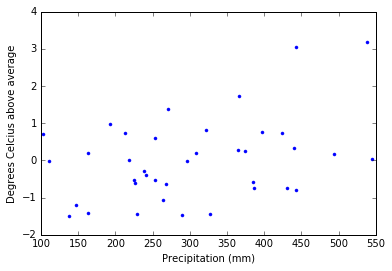

In [68]:
print pearsonr(precip, NINO3)
plt.plot(precip,NINO3, marker = '.', linewidth = 0)
plt.ylabel('Degrees Celcius above average')
plt.xlabel('Precipitation (mm)')

(0.0051124458580692608, 0.9756981034908927)


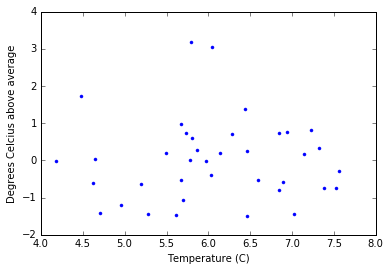

In [69]:
print pearsonr(temp, NINO3)
plt.plot(temp,NINO3, marker = '.', linewidth = 0)
plt.xlabel('Temperature (C)')
plt.ylabel('Degrees Celcius above average')

2f)

The graphic shows the heat temperature increases moving upwards and to the left. It looks like we are in a neutral event currently.